In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
from env import user, password, host
import env
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import csv
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import wrangle_zillow

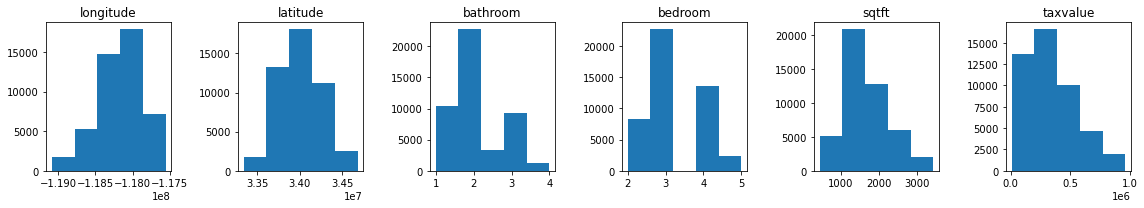

In [2]:
zillow_train, zillow_validate, zillow_test=wrangle_zillow.wrangle_zillow(1.5)

In [3]:
zillow_train

longitude    latitude  bathroom  bedroom    fips   sqtft  zipcode  \
11970 -118308104.0  34261697.0       1.0      2.0  6037.0   884.0  96282.0   
27787 -117980838.0  33810914.0       4.0      5.0  6059.0  2430.0  96203.0   
1057  -118715729.0  34294813.0       2.5      5.0  6111.0  2718.0  97116.0   
12100 -118341408.0  34175981.0       2.0      3.0  6037.0  1397.0  96437.0   
46355 -118579671.0  34200230.0       2.0      4.0  6037.0  1342.0  96341.0   
...            ...         ...       ...      ...     ...     ...      ...   
16235 -117805905.0  34111823.0       1.0      3.0  6037.0  2167.0  96513.0   
39490 -117824821.0  33794417.0       2.0      4.0  6059.0  1549.0  97065.0   
32184 -118018635.0  33699202.0       2.5      4.0  6059.0  2451.0  96966.0   
1318  -119025831.0  34227500.0       2.0      3.0  6111.0  1216.0  97089.0   
586   -118594283.0  34146763.0       2.0      3.0  6037.0  1349.0  96387.0   

       taxvalue                  county  month  
11970  282972.0  Los Angeles County, CA      3  
27787  543910.0       Orange County, CA      5  
1057   549319.0      Ventura County, CA      1  
12100  292869.0  Los Angeles County, CA      3  
46355  280775.0  Los Angeles County, CA      7  
...         ...                     ...    ...  
16235  233500.0  Los Angeles County, CA      4  
39490  506000.0       Orange County, CA      7  
32184  705256.0       Orange County, CA      5  
1318    54753.0      Ventura County, CA      1  
586    490677.0  Los Angeles County, CA      1  

[26261 rows x 10 columns]

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

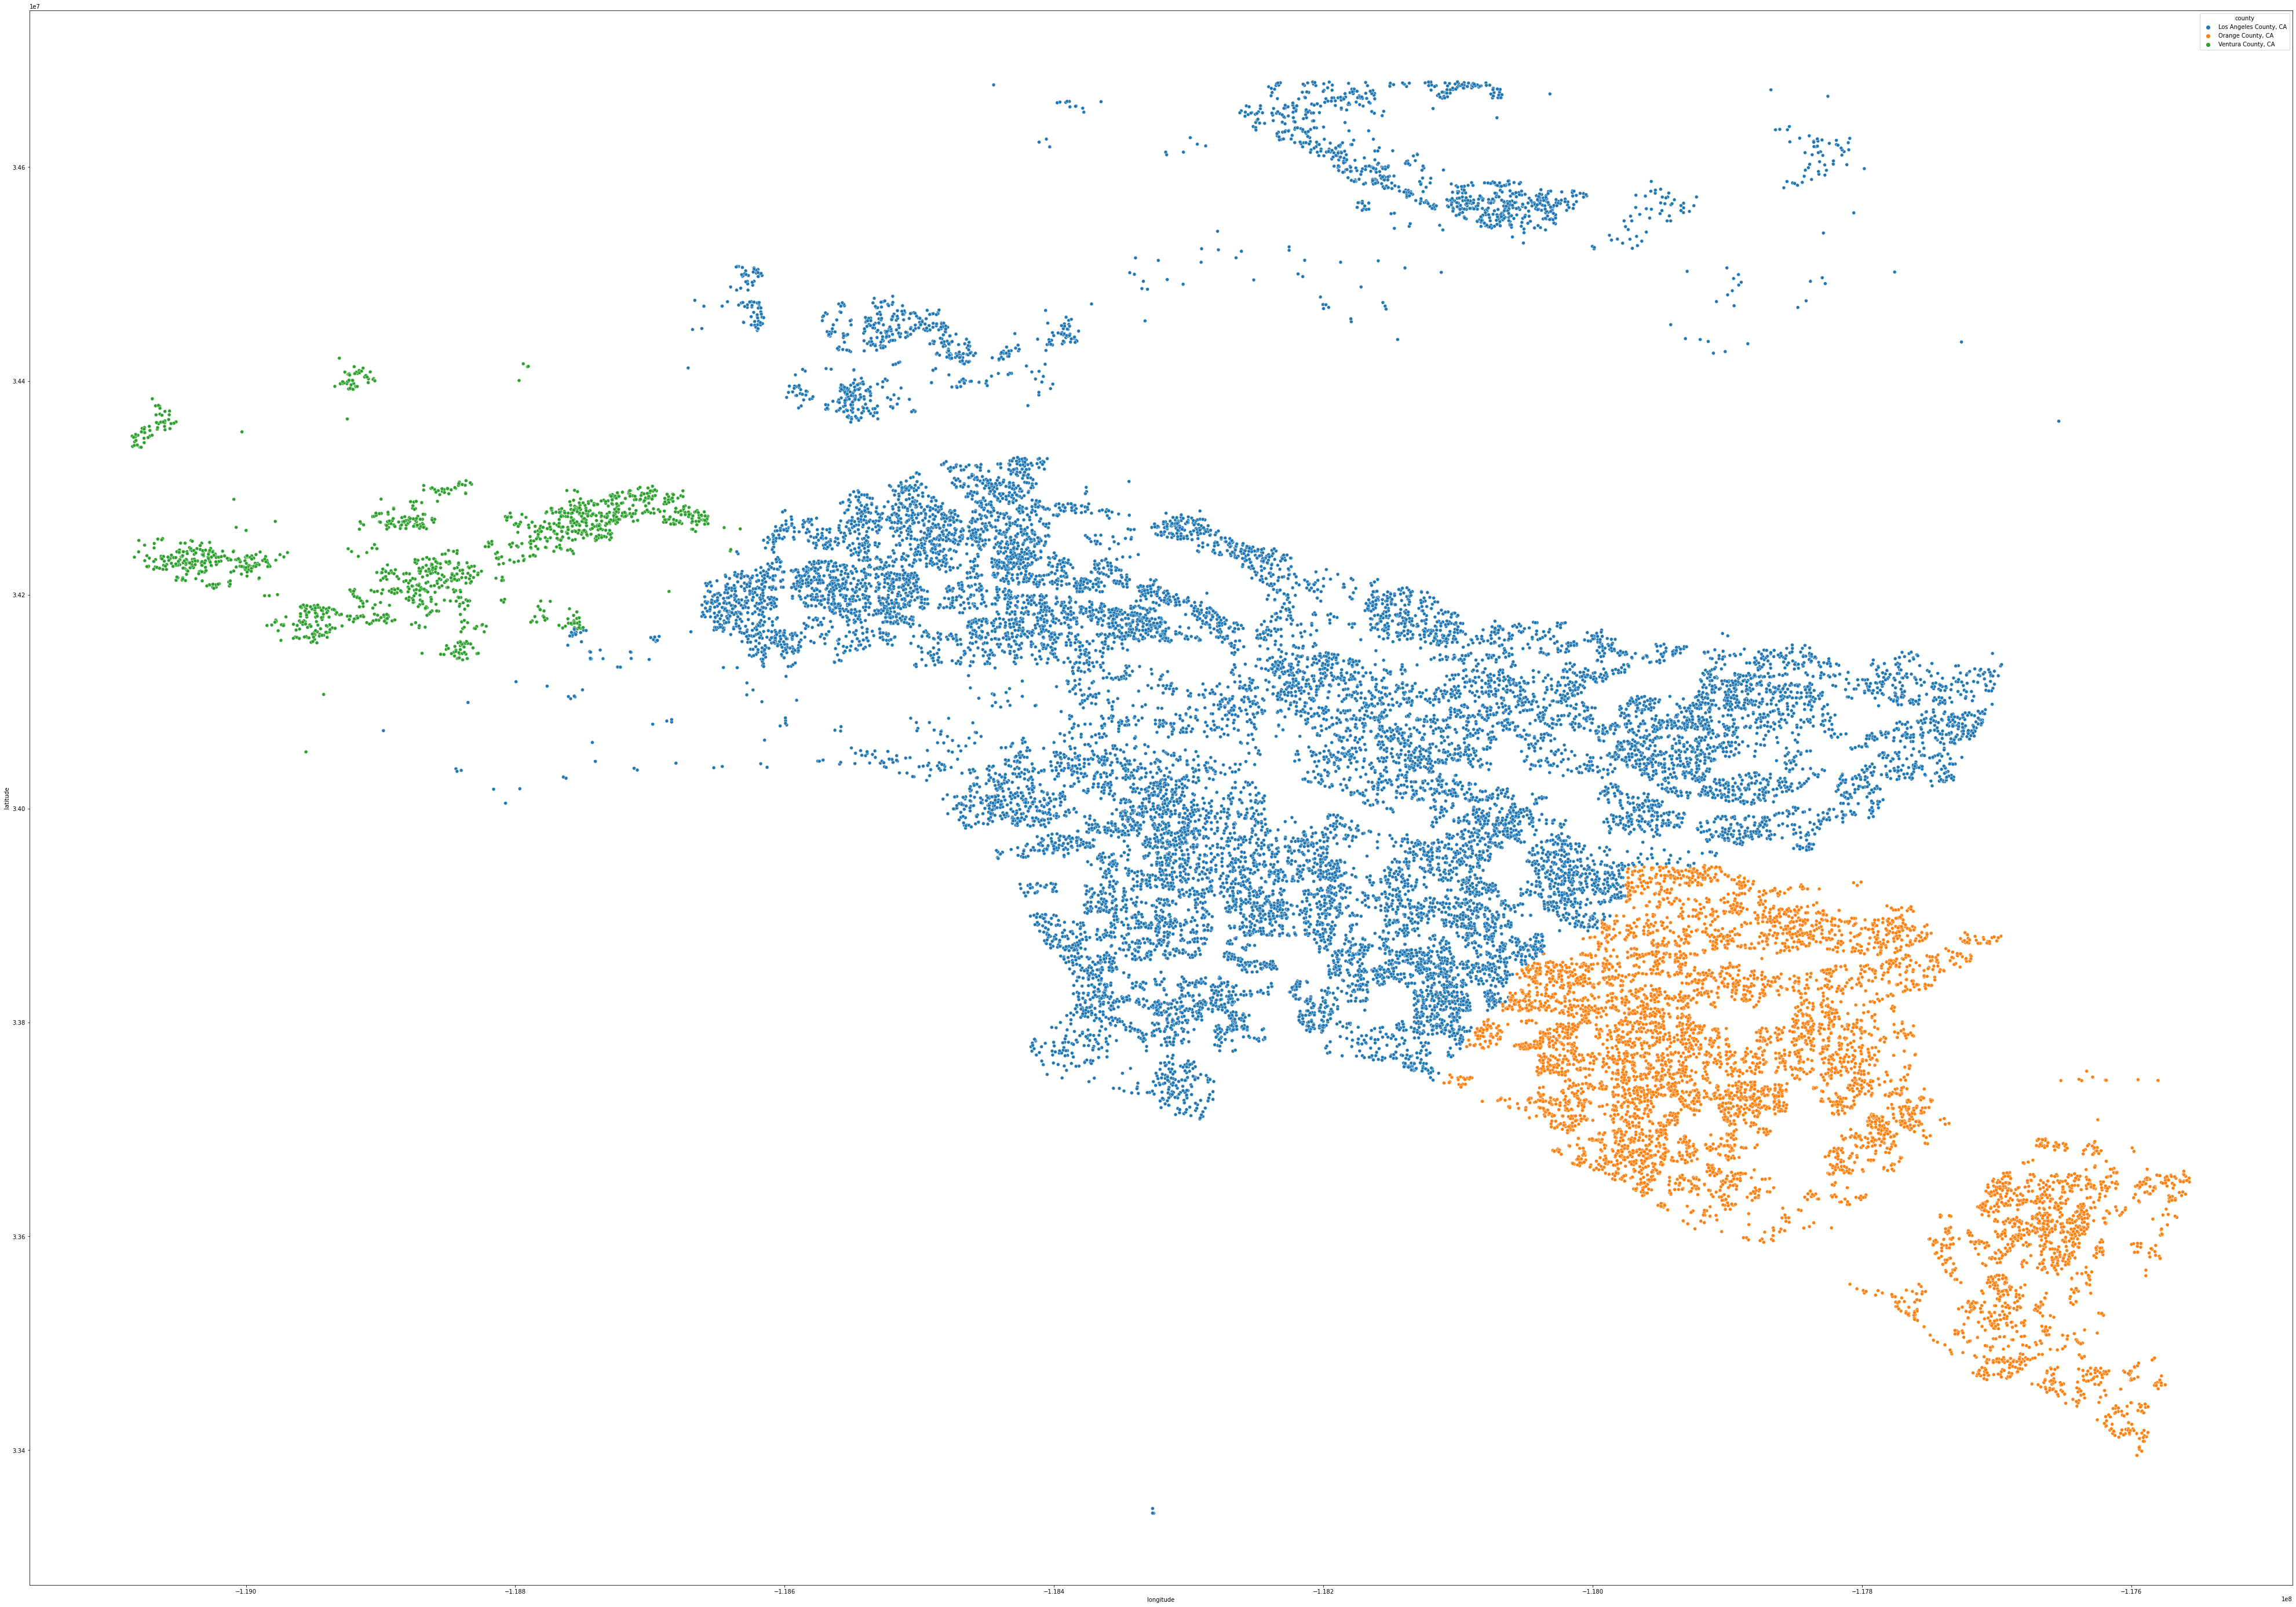

In [4]:
fig, ax = plt.subplots(figsize = (70,50))
sns.scatterplot(data=zillow_train,x=zillow_train['longitude'],
            y=zillow_train['latitude'], zorder=1,hue='county')

In [5]:
zillow_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26261 entries, 11970 to 586
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   longitude  26261 non-null  float64
 1   latitude   26261 non-null  float64
 2   bathroom   26261 non-null  float64
 3   bedroom    26261 non-null  float64
 4   fips       26261 non-null  object 
 5   sqtft      26261 non-null  float64
 6   zipcode    26261 non-null  object 
 7   taxvalue   26261 non-null  float64
 8   county     26261 non-null  object 
 9   month      26261 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.2+ MB


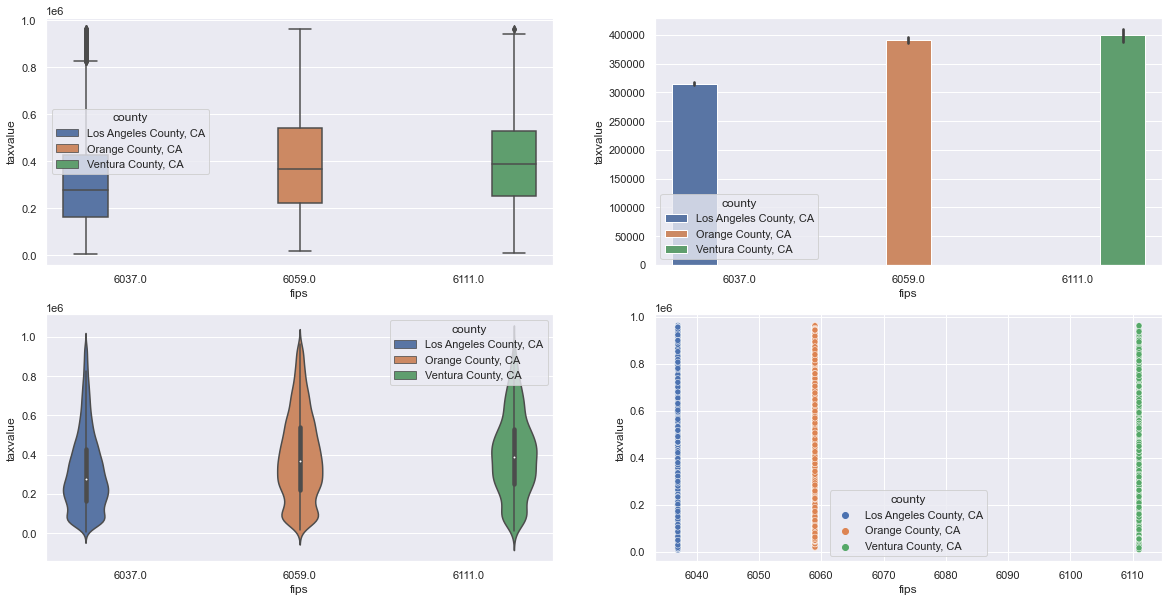

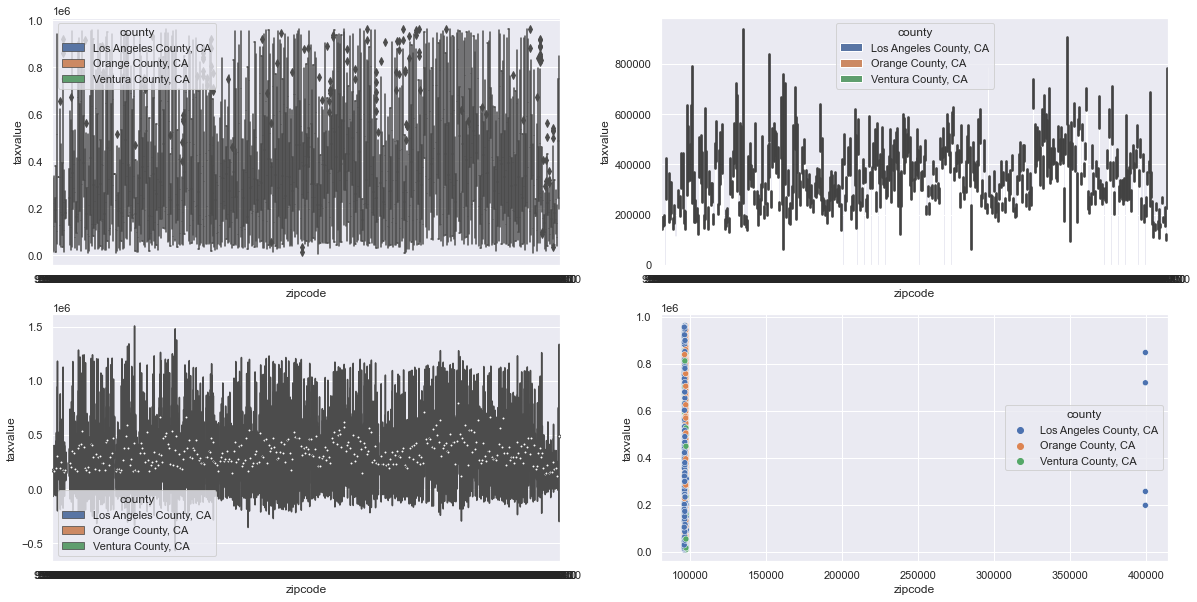

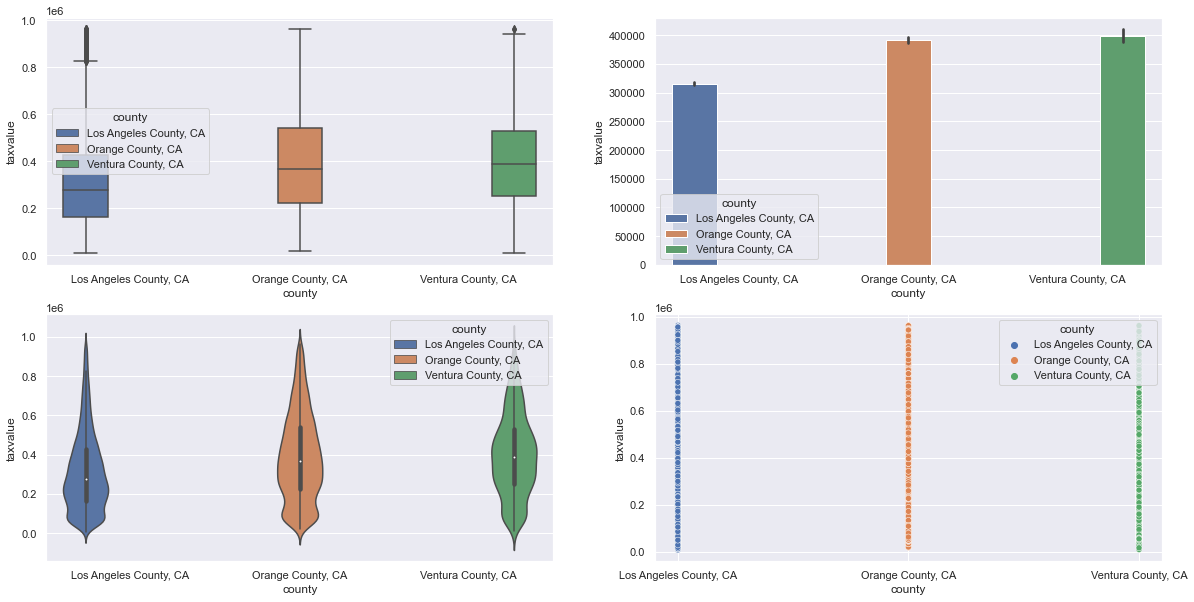

In [6]:
def plot_categorical_and_continuous_vars():
    columns = zillow_train.select_dtypes('object')
    for col in columns:
        sns.set(rc={'figure.figsize':(20,10)})
        fig, axes = plt.subplots(2,2)
        sns.boxplot(x= col, y="taxvalue", data=zillow_train, hue = 'county', ax = axes[0,0])
        sns.barplot(x= col, y="taxvalue", data=zillow_train, hue = 'county', ax = axes[0,1])
        sns.violinplot(x= col, y="taxvalue", data=zillow_train, hue = 'county', ax = axes[1,0])
        sns.scatterplot(x= col, y="taxvalue", data=zillow_train, hue = 'county', ax = axes[1,1])
plot_categorical_and_continuous_vars()

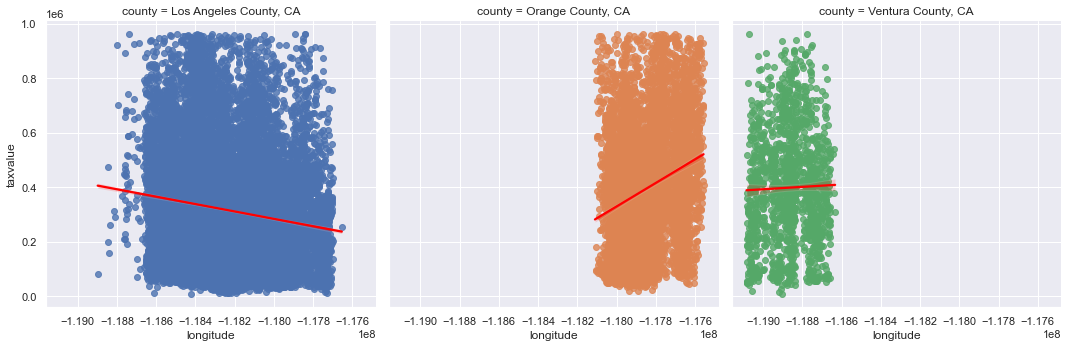

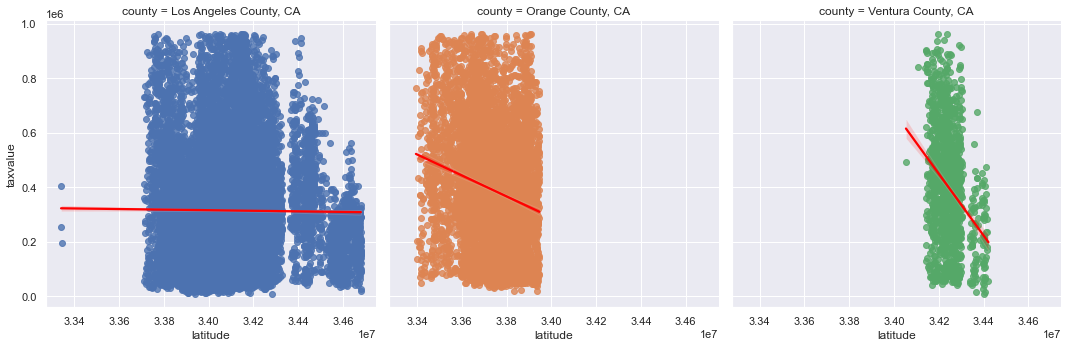

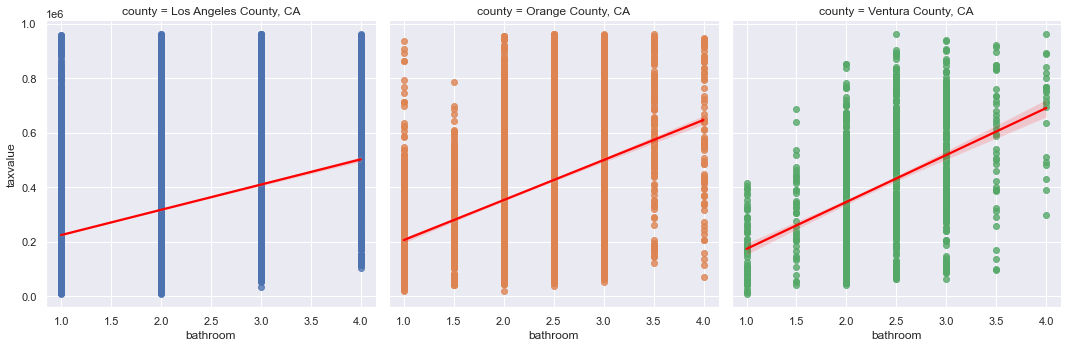

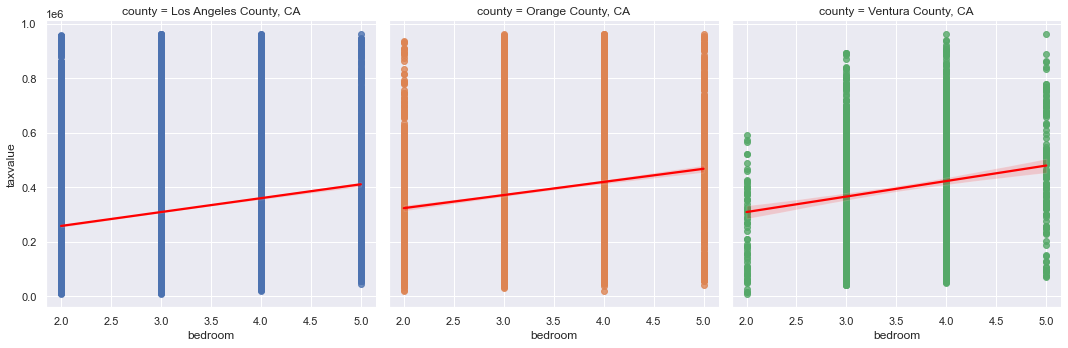

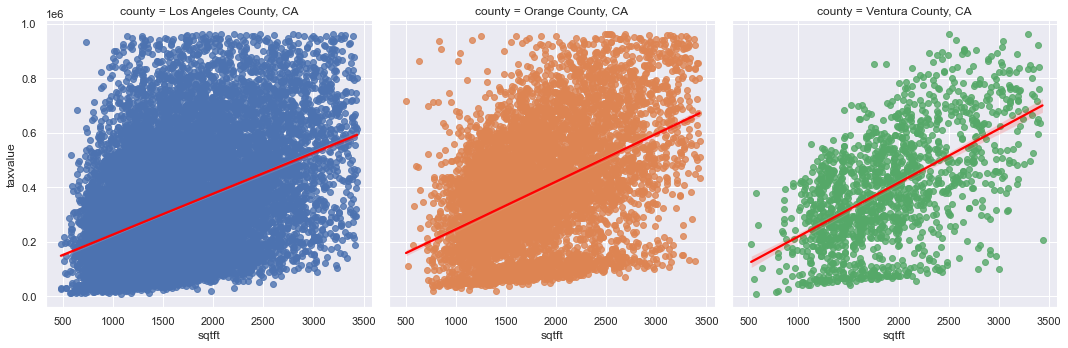

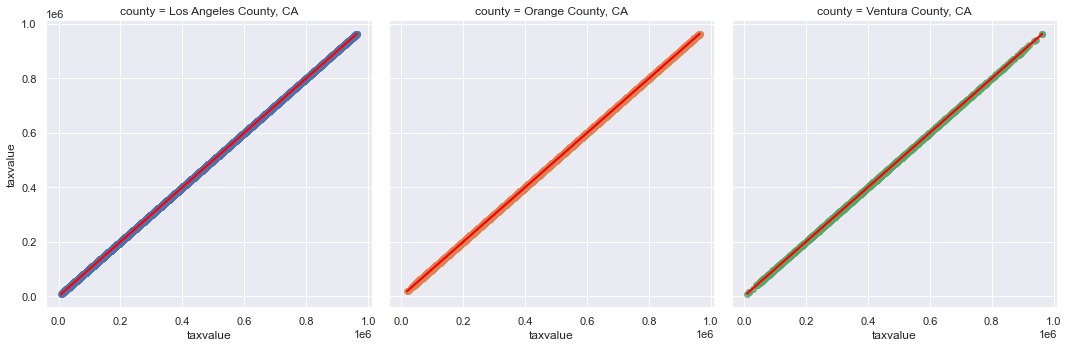

In [9]:
def plot_variable_pairs():
    columns = zillow_train.select_dtypes('float')
    for col in columns:
        sns.lmplot(x= col, y="taxvalue", data=zillow_train, col = 'county', hue = 'county', line_kws={'color': 'red'})
plot_variable_pairs()

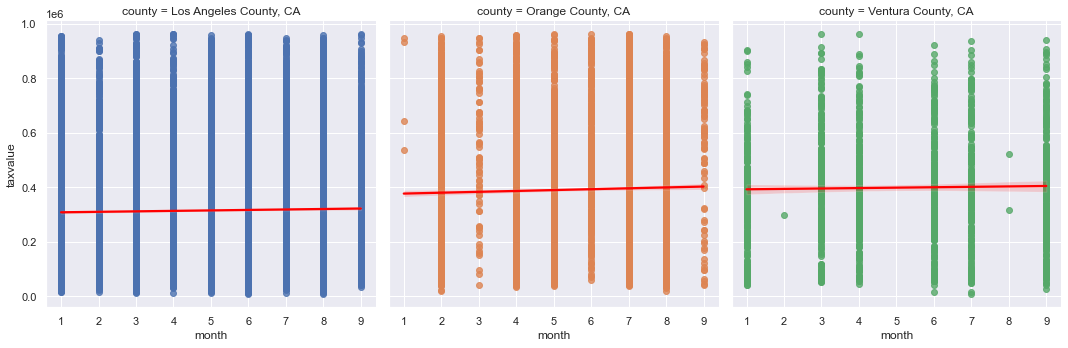

In [15]:
sns.lmplot(x= 'month', y="taxvalue", data=zillow_train, col = 'county', hue = 'county', line_kws={'color': 'red'})


In [26]:
train = zillow_train[['bathroom', 'bedroom', 'sqtft', 'taxvalue']]
train_corr=train.corr
plt.figure(figsize=(8,6))
sns.heatmap(train_corr, annot=True)

ValueError: Must pass 2-d input. shape=()

<Figure size 576x432 with 0 Axes>

<AxesSubplot:xlabel='bedroom', ylabel='Density'>

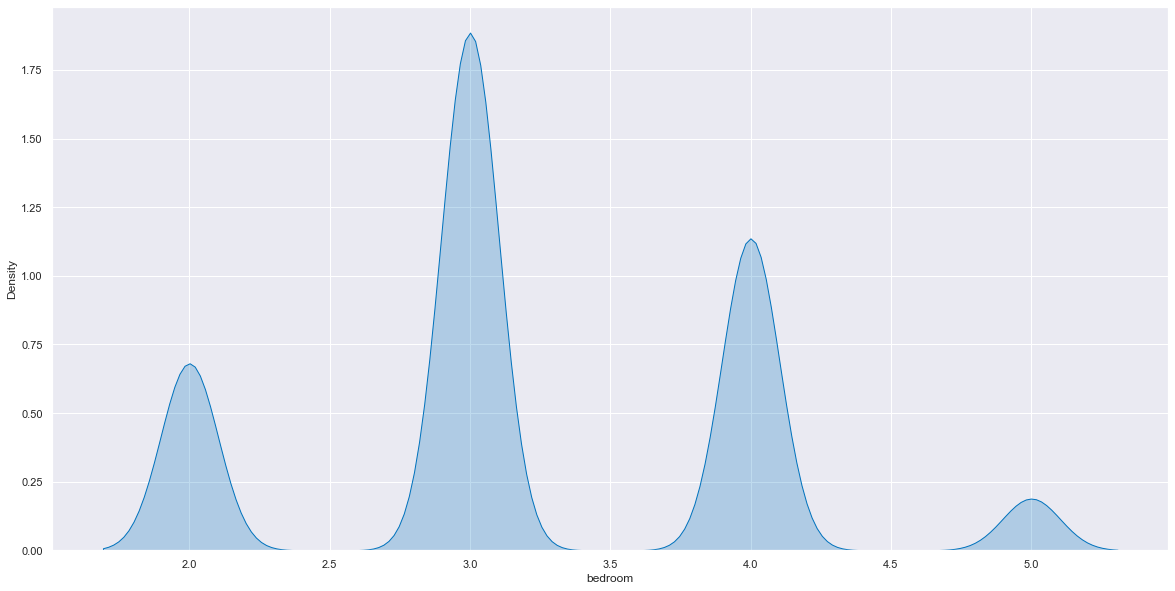

In [32]:
sns.kdeplot(zillow_train.bedroom[(zillow_train["taxvalue"]<1000000)],
                color="#0072BD", shade = True)